In [2]:
import gym
import numpy as np
import tensorflow as tf
env = gym.make('Taxi-v2')
obs = env.reset()
env.render()

/Users/am/anaconda3/envs/tensorflow/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



In [3]:
m = env.observation_space.n  # size of the state space
n = env.action_space.n  # size of action space

In [4]:
# Intialize the hyperparameters
gamma = 0.9
max_episode = 1000
max_steps = 100
epsilon = 0.4
alpha = 0.01

In [5]:
class QNetwork:
    def __init__(self,m,n,alpha):
        self.s = tf.placeholder(shape=[1,m], dtype=tf.float32)
        W = tf.Variable(tf.random_normal([m,n], stddev=2))
        bias = tf.Variable(tf.random_normal([1, n]))
        self.Q = tf.matmul(self.s,W) + bias
        self.a = tf.argmax(self.Q,1)
        
        self.Q_hat = tf.placeholder(shape=[1,n],dtype=tf.float32)
        loss = tf.reduce_sum(tf.square(self.Q_hat-self.Q))
        optimizer = tf.train.GradientDescentOptimizer(learning_rate=alpha)
        self.train = optimizer.minimize(loss)
        init = tf.global_variables_initializer()
        
        self.sess = tf.Session()
        self.sess.run(init)
        
    def get_action(self,s):
        return self.sess.run([self.a,self.Q], feed_dict={self.s:s})
    
    def learnQ(self,s,Q_hat):
        self.sess.run(self.train, feed_dict= {self.s:s, self.Q_hat:Q_hat})
        
    def Qnew(self,s):
        return self.sess.run(self.Q, feed_dict={self.s:s})
            
    

In [6]:
QNN = QNetwork(m,n, alpha)
rewards = []
for i in range(max_episode):
    # Start with new environment
    s = env.reset()
    S = np.identity(m)[s:s+1]
    done = False
    counter = 0
    rtot = 0
    for _ in range(max_steps):
        # Choose an action using epsilon greedy policy
        a, Q_hat = QNN.get_action(S) 
        p = np.random.rand()
        if p > epsilon:
            a[0] = env.action_space.sample()  #explore
               
        s_new, r, done, _ = env.step(a[0])
        rtot += r
        # Update Q table
        S_new = np.identity(m)[s_new:s_new+1]
        Q_new = QNN.Qnew(S_new) 
        maxQ = np.max(Q_new)
        Q_hat[0,a[0]] = r + gamma*maxQ
        QNN.learnQ(S,Q_hat)
        S = S_new
        #print(Q_hat[0,a[0]],r)
        if done:
            break
    rewards.append(rtot)
print ("Total reward per episode is: " + str(sum(rewards)/max_episode))    

Total reward per episode is: -275.812


Text(0,0.5,'Total Reward')

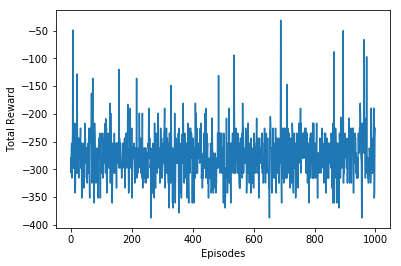

In [8]:
import matplotlib.pyplot as plt
% matplotlib inline
plt.plot(rewards)
plt.xlabel('Episodes')
plt.ylabel('Total Reward')

In [9]:
s = env.reset()
S = np.identity(m)[s:s+1]
done = False
env.render()
# Test the learned Agent
for i in range(12):
    a,_ = QNN.get_action(S)
    s, _, done, _ = env.step(a[0])
    S = np.identity(m)[s:s+1]
    env.render()
    if done:
        break    

+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+

+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: